In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import sqlite3

In [2]:
url = 'https://companies-market-cap-copy.vercel.app/index.html'

response = requests.get(url)

if response:
    soup = BeautifulSoup(response.text, 'html.parser')

soup


<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/ic

In [3]:
tables = soup.find_all('table')
tables

[<table class="table" style="width:100%">
 <thead>
 <tr>
 <th>Year</th>
 <th>Revenue</th>
 <th>Change</th>
 </tr>
 </thead>
 <tbody>
 <tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">

In [4]:
all_tables = pd.read_html(url)
data = all_tables[0]

data.head()

,Year,Revenue,Change
0,2024,$97.15 B,0.39%
1,2023,$96.77 B,18.8%
2,2022,$81.46 B,51.35%
3,2021,$53.82 B,70.67%
4,2020,$31.53 B,28.31%


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     16 non-null     int64 
 1   Revenue  16 non-null     object
 2   Change   15 non-null     object
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [6]:
# Converting Revenue column to integer

data['Revenue'] = data['Revenue'].str.replace('$', '')
data['Revenue'] = data['Revenue'].str.replace(' B', '')

data['Revenue'] = data['Revenue'].astype('float')
data['Revenue'] = data['Revenue'] * 1000000000
data['Revenue'] = data['Revenue'].astype('int')


data['Revenue'].head()

0    97150000000
1    96770000000
2    81460000000
3    53820000000
4    31530000000
Name: Revenue, dtype: int64

In [7]:
# Converting Change column to float

data['Change'] = data['Change'].str.replace('%', '')

data['Change'] = data['Change'].astype('float')

data['Change'].head()


0     0.39
1    18.80
2    51.35
3    70.67
4    28.31
Name: Change, dtype: float64

In [8]:
# Replacing the initial null in the Change column with 0

data = data.fillna(value=0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     16 non-null     int64  
 1   Revenue  16 non-null     int64  
 2   Change   16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 516.0 bytes


In [9]:
# SQL table

connection = sqlite3.connect('tesla_rev.db')

In [10]:
data.to_sql('tesla_rev', connection, index=False, if_exists='replace')

16

In [11]:
query = 'SELECT * FROM tesla_rev'
result = pd.read_sql_query(query, connection)
result

,Year,Revenue,Change
0,2024,97150000000,0.39
1,2023,96770000000,18.80
2,2022,81460000000,51.35
3,2021,53820000000,70.67
4,2020,31530000000,28.31
5,2019,24570000000,14.52
6,2018,21460000000,82.51
7,2017,11750000000,67.98
8,2016,7000000000,73.01
9,2015,4040000000,26.50


In [12]:
connection.commit()
connection.close()

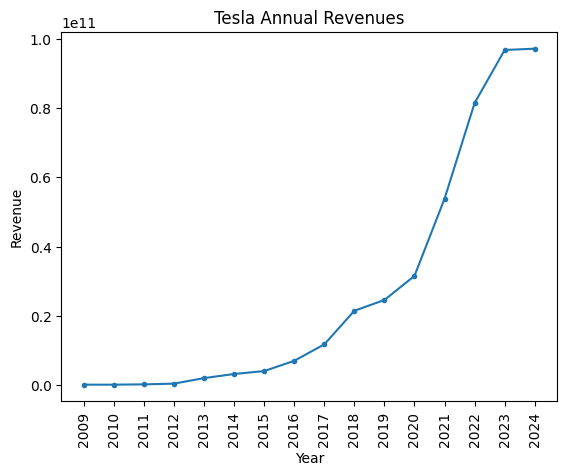

In [13]:
plt.plot(data['Year'], data['Revenue'], marker='.')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(data['Year'], rotation=90)
plt.title('Tesla Annual Revenues')
plt.show()